In [183]:
# Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [184]:
# Upload Dataset into the notebook
airline=pd.read_csv("D:\CSV FIles Path\Assignments\Clustering\EastWestAirlines1.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [185]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


## Drop Column ID.

In [186]:
airline.drop(['ID#'],axis=1,inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


## Create and Append Array

In [187]:
array=airline.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

## Scaling of DATA. Apply standarised Scaling

In [188]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [189]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## Apply DBSCAN to find the nearest neighbour and the K Distance

In [190]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

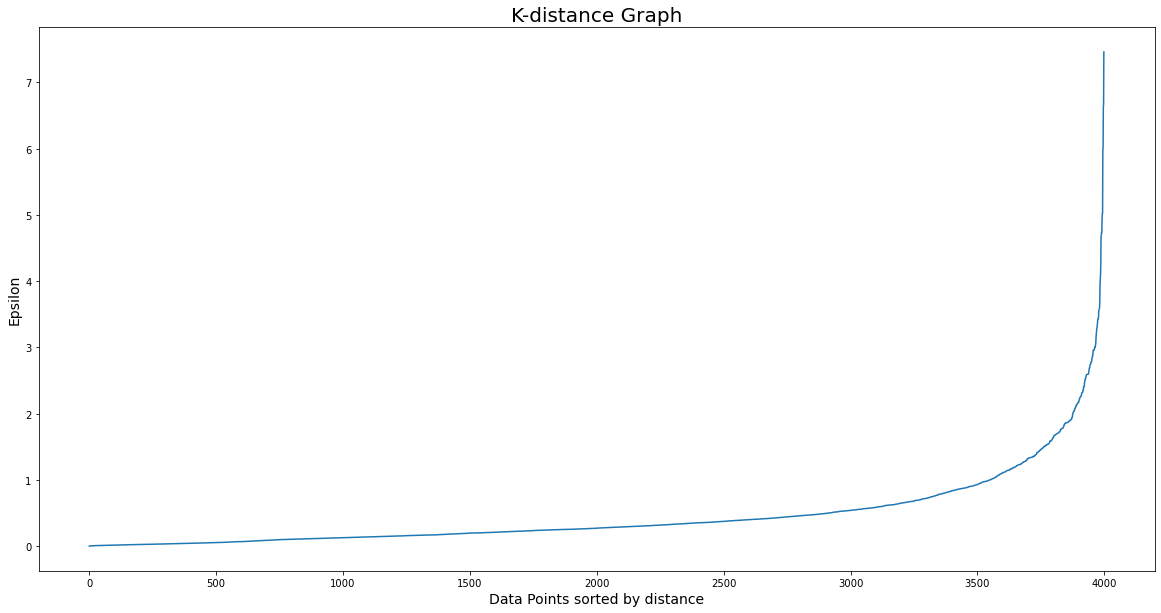

In [191]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

## Elbow seems to be at 2. hence let take the EPSILON at 2. Epsilon can be taken anywhere within 3

In [192]:
dbscan = DBSCAN(eps=2, min_samples=12)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=12)

## Noisy samples are given the label -1

In [193]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [194]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


## Add Clusters to the original dataset

In [195]:
airline['Cluster no']=pd.DataFrame(dbscan.labels_)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster no
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


## Check the values under each Clusters

In [196]:
airline['Cluster no'].value_counts()
## -1 Values are the OUTLIERS

 0    2440
 1    1302
-1     241
 2      16
Name: Cluster no, dtype: int64

## check the accuracy of the Cluster

In [197]:
metrics.silhouette_score
metrics.silhouette_score(X,dbscan.labels_)

0.255303940580989

## Check the mean of the Clusters to draw inferences

In [198]:
airline.groupby('Cluster no').agg('mean').T

Cluster no,-1,0,1,2
Balance,225687.589212,57585.495902,75887.015361,39218.5000
Qual_miles,1491.705394,41.909016,87.983871,0.0000
cc1_miles,2.668050,1.695902,2.641321,1.0000
cc2_miles,1.174274,1.000000,1.000000,2.0000
cc3_miles,1.203320,1.000000,1.000000,1.0000
Bonus_miles,47729.796680,9775.423361,25391.933948,9189.2500
Bonus_trans,25.423237,8.886475,14.109063,13.5000
Flight_miles_12mo,3311.946058,187.600820,445.843318,209.3750
Flight_trans_12,9.630705,0.547951,1.399386,0.8125
Days_since_enroll,4851.966805,3811.271311,4566.139785,3511.1875


## Lets Visualize the Cluster using Scatter Plot

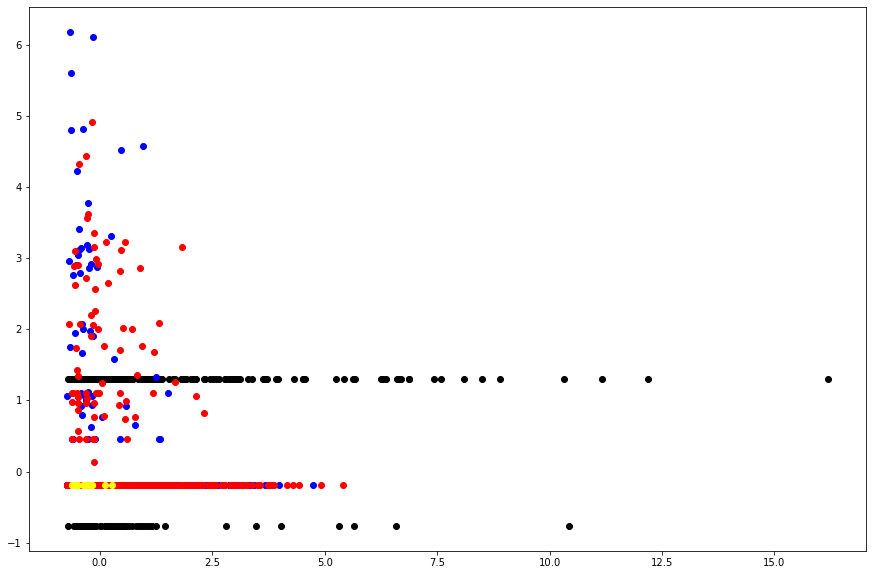

In [199]:
# Visualization Including the OUTLIERS, which are shown as -1 in BLACK Color

plt.figure(figsize=(15,10))
plt.scatter(X[dbscan.labels_ == -1,0], X[dbscan.labels_ == -1,-1], c = 'black')
plt.scatter(X[dbscan.labels_ == 0,0], X[dbscan.labels_ == 0,1], c = 'blue')
plt.scatter(X[dbscan.labels_ == 1,0], X[dbscan.labels_ == 1,1], c = 'red')
plt.scatter(X[dbscan.labels_ == 2,0], X[dbscan.labels_ == 2,1], c = 'yellow')
#plt.scatter(X[dbscan.labels_ == 3,0], X[dbscan.labels_ == 3,1], c = 'green')
plt.show()

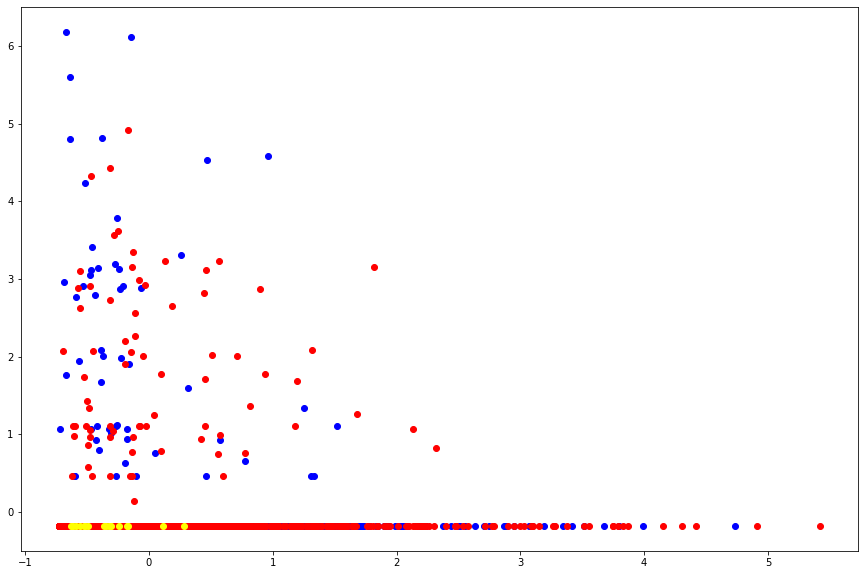

In [200]:
# Visualization EXcluding the OUTLIERS.

plt.figure(figsize=(15,10))
plt.scatter(X[dbscan.labels_ == 0,0], X[dbscan.labels_ == 0,1], c = 'blue')
plt.scatter(X[dbscan.labels_ == 1,0], X[dbscan.labels_ == 1,1], c = 'red')
plt.scatter(X[dbscan.labels_ == 2,0], X[dbscan.labels_ == 2,1], c = 'yellow')
#plt.scatter(X[dbscan.labels_ == 3,0], X[dbscan.labels_ == 3,1], c = 'green')
plt.show()
